In [1]:
# Importing Neccessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn as sk
from sklearn.model_selection import train_test_split as tt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import scipy.stats as stats

## Data Dictionary - 
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Step 1- Reading and Analyzing the Data

In [2]:
# Import the csv file for bike sharing data
day = pd.read_csv('/Users/mhaider1/Downloads/Data Science/Machine Learning 1/ML Assignment/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the shape of the dataset
day.shape

(730, 16)

In [4]:
# checking infop of the dataset to make sure if there are any null values
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# checking for null values column wise
print(day.isna().sum()[day.isna().sum()>0])

# Checking row wise null values
print(day.isna().sum(axis=0)[day.isna().sum(axis=0)>0])

Series([], dtype: int64)
Series([], dtype: int64)


In [7]:
# drop duplicates if any
day.drop_duplicates(subset=None, inplace=True)

In [8]:
# Dropping instant , dteday , casual, registered and temp columns.
# Instant is just index which is not relevant to our analysis
# dteday is already decomposed into day , month and year columns in separate columns in the data
# casual and registered bifurcation is not needed for analysis as modelling has to be done on total count of rentals
# atemp column makes more sense for this data as temp is just the one which a instrument is recording where as a temp is temperature felt by the user
day.drop(columns=['instant' , 'dteday' , 'casual', 'registered','temp'], axis =1, inplace=True )
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [9]:
# Performing EDA
# Saggregating numerical and categorical columns
num_cols = ['atemp','hum','windspeed']
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

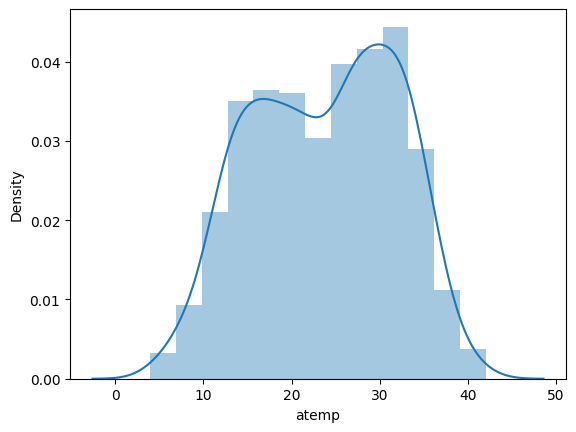

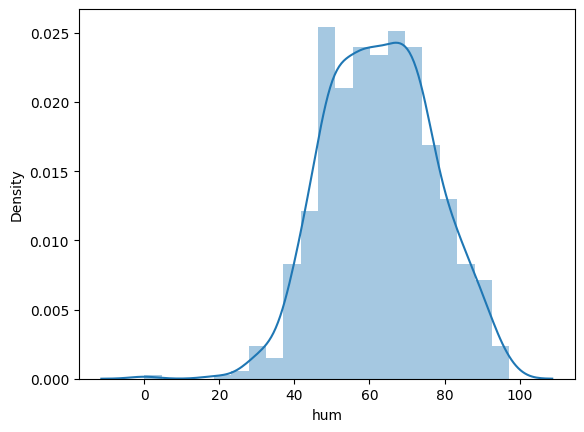

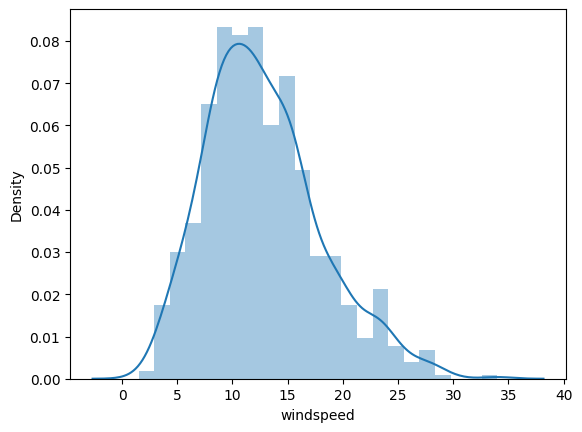

In [10]:
# Univariate Analysis
for i in num_cols:
    sns.distplot(day[i])
    plt.show()

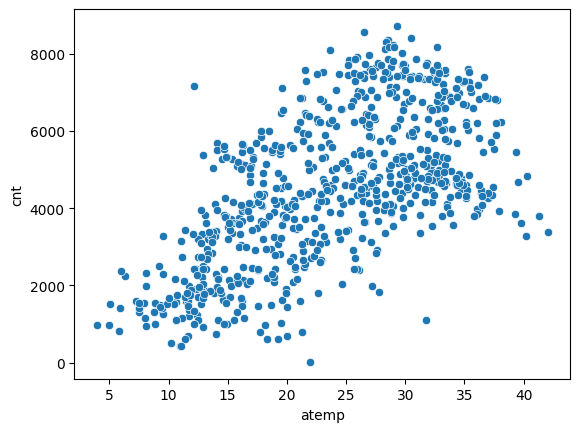

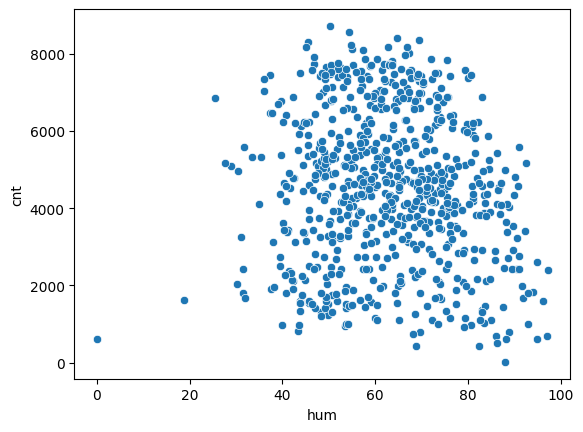

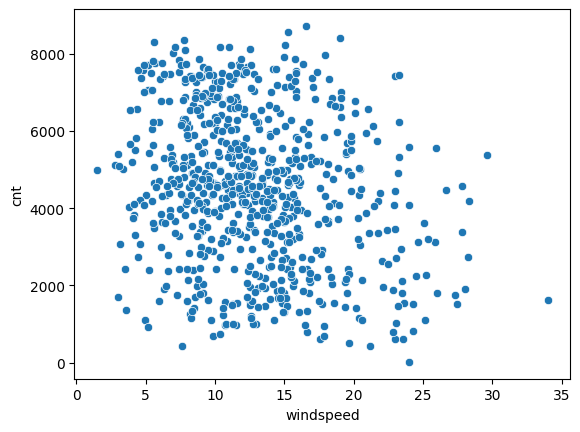

In [11]:
#Bivariate Analysis
# creating scatter plot for categorical columns
for i in num_cols:
    sns.scatterplot(y=day['cnt'],x=day[i])
    plt.show()

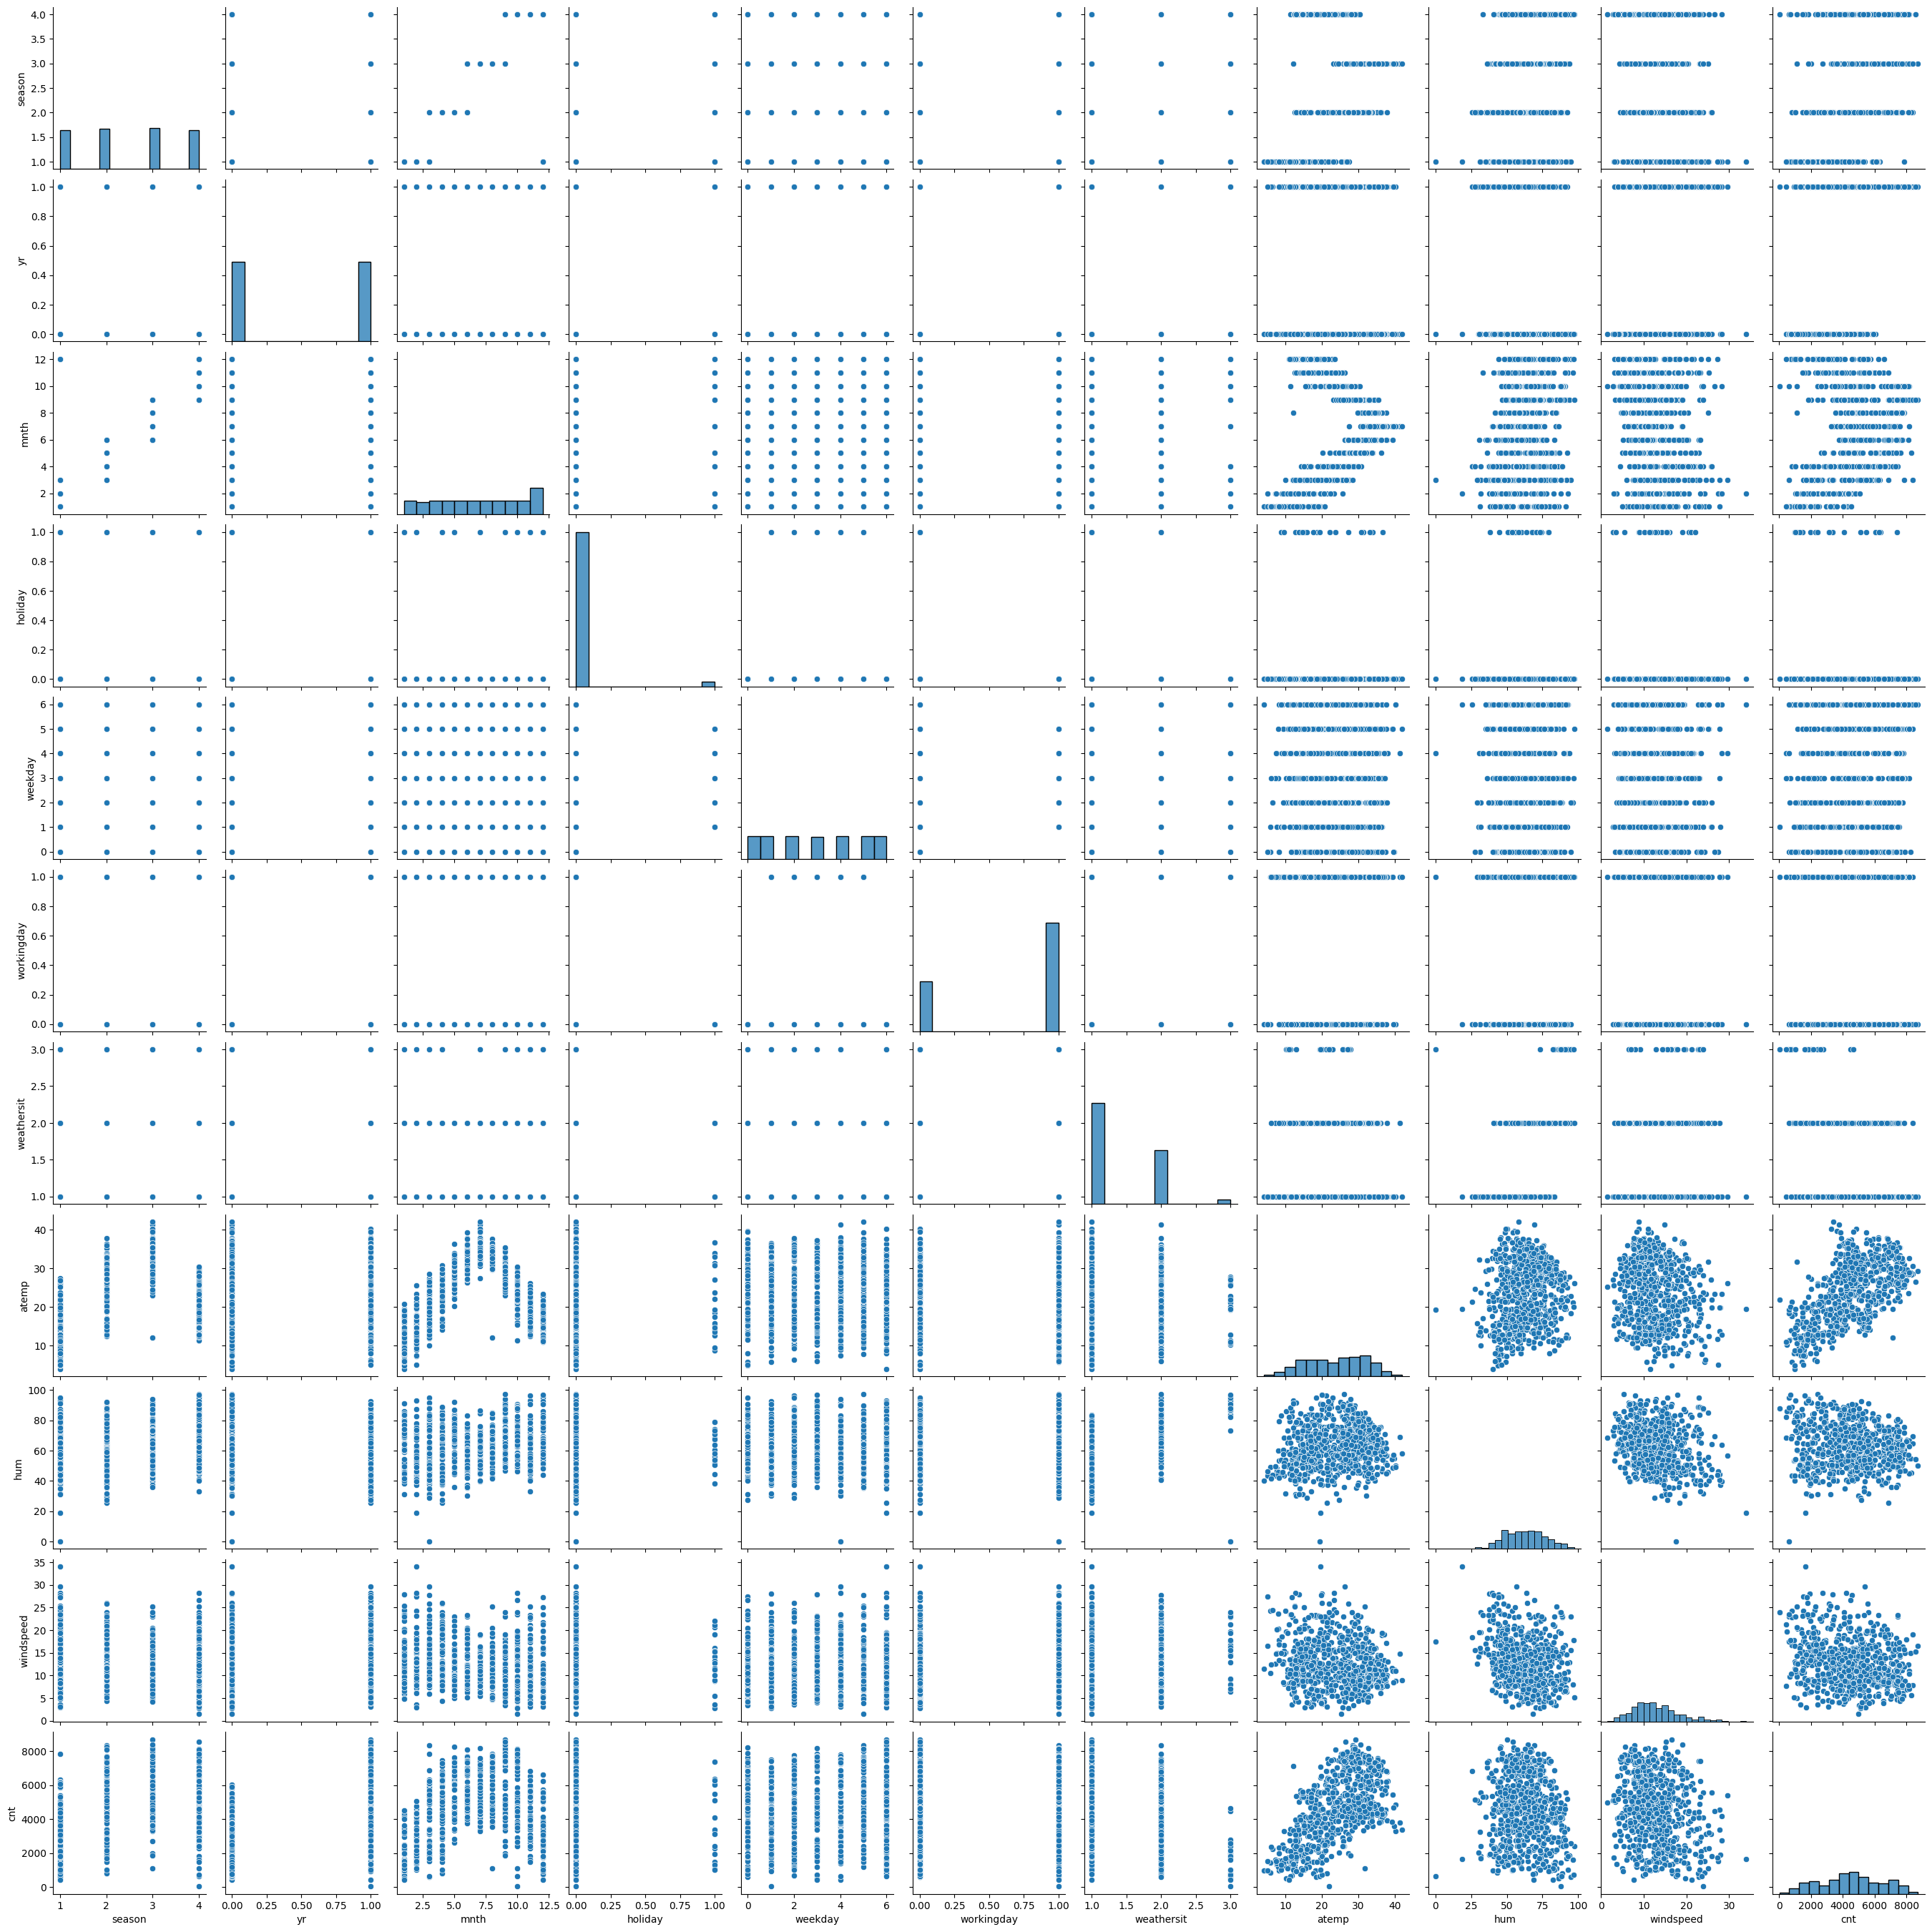

In [12]:
# Creating pairlot 

sns.pairplot(day)
plt.show()

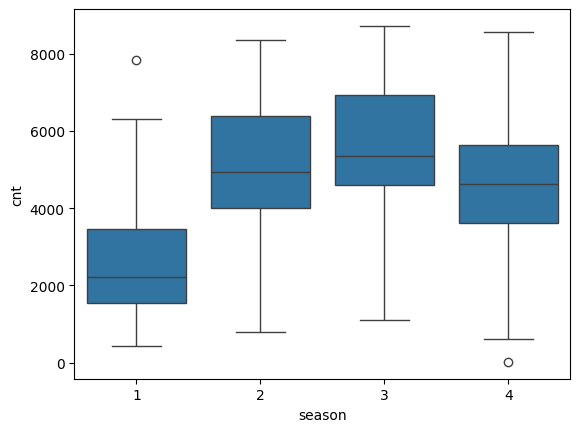

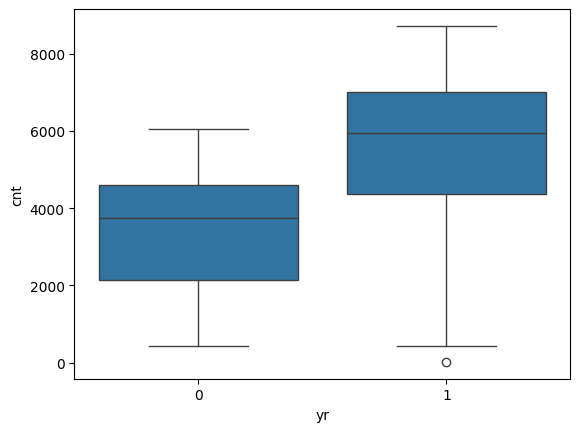

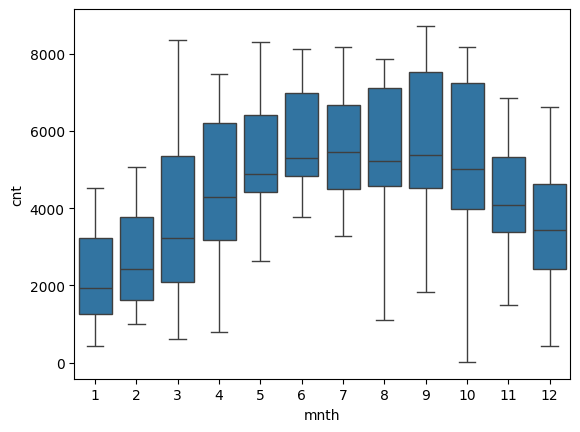

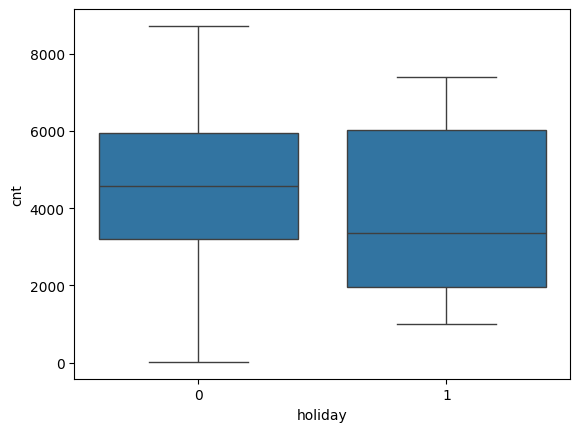

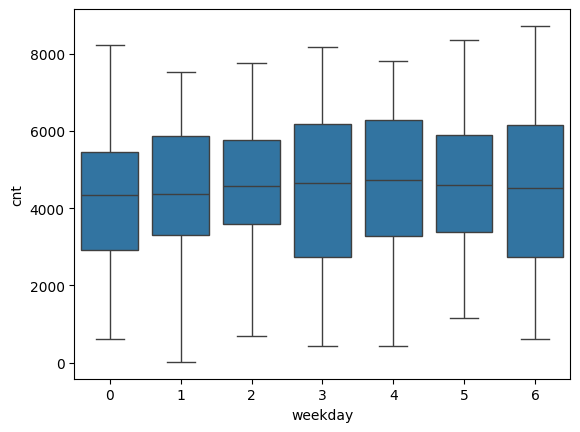

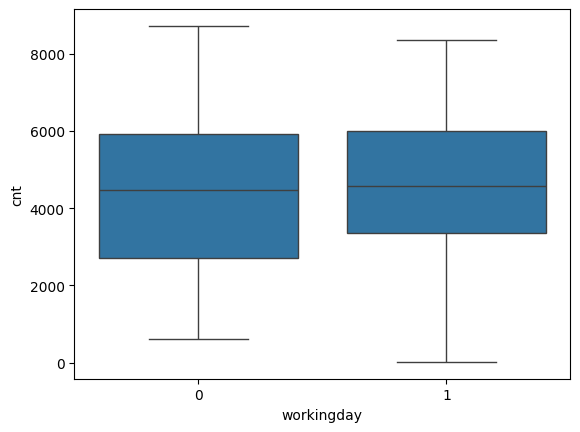

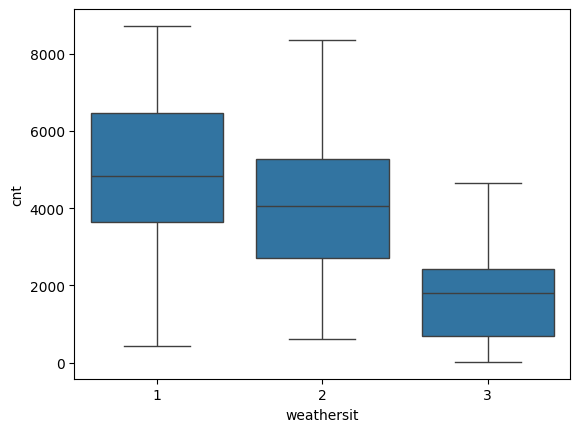

In [13]:
# creating box plots with categorical columnbs 
for i in cat_cols:
    sns.boxplot(x=day[i],y=day['cnt'])
    plt.show()

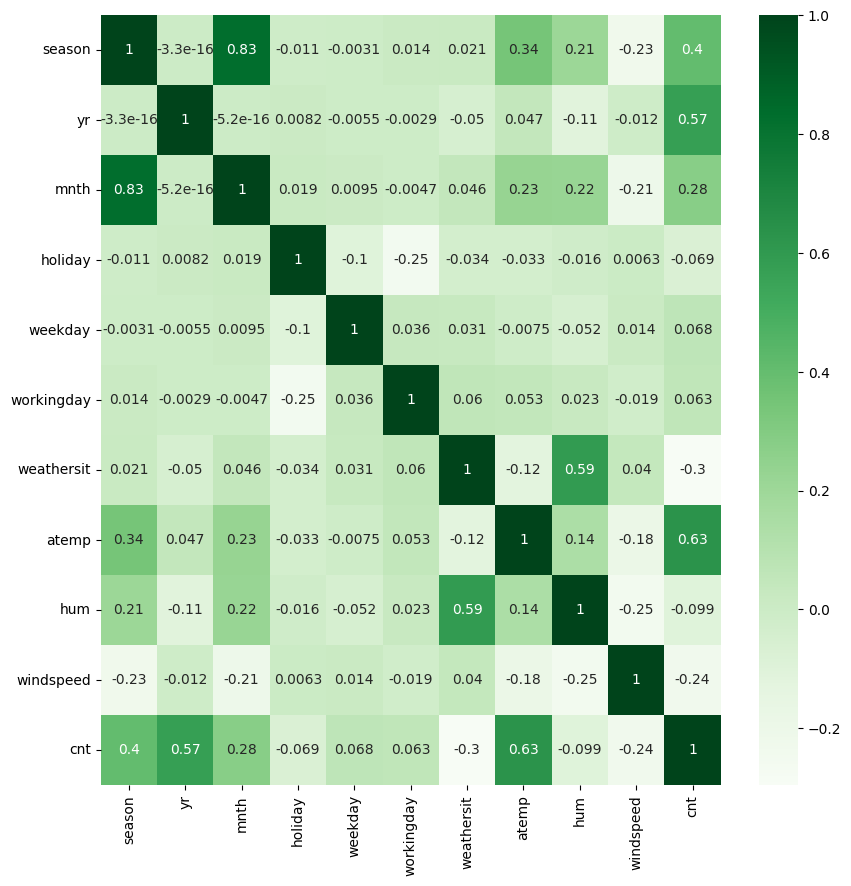

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(day.corr(),cmap='Greens',annot=True)
plt.show()


## Staep 2 - Preparing the data  for Modelling

In [15]:
# dropping holiday and weekday column as working day column represnts days where all days have been worked and does not include holidays as well as weekends
day.drop(columns=['weekday','holiday'],axis=1,inplace=True)

In [16]:
# Saggregating Month columns in quarters and defining dummies for the same and leaving out fourth quarter as only n-1 dummies are needed
day["FirstQuarter"] = day["mnth"].apply(lambda x: 1 if x<=3 else 0)
day["SecondQuarter"] = day["mnth"].apply(lambda x: 1 if 4<=x<=6 else 0)
day["ThirdQuarter"] = day["mnth"].apply(lambda x: 1 if x>6 else 0)

# Dropping month column
day.drop(columns=['mnth'],axis=1,inplace=True)

In [17]:
# creating dummies for weathersit column. Only two dummies created as data is available only for 3 categories and need n-1 dummies only.
day['1_Clear_Weather']  = day["weathersit"].apply(lambda x: 1 if x==1 else 0)
day['2_Misty_Weather']  = day["weathersit"].apply(lambda x: 1 if x==2 else 0)

# Dropping weathersit column
day.drop(columns=['weathersit'],axis=1,inplace=True)

In [18]:
# creating dummies for season column. 
day['season'] = day['season'].apply(lambda x : 'Spring' if x==1 else('summer' if x==2 else ('fall' if x==3 else 'winter')))
dum = pd.get_dummies(day['season'],dtype='int',drop_first=True)
day= pd.concat([day,dum],axis=1)
# dropping season column
day.drop(columns=['season'],axis=1,inplace=True)


In [19]:
# Splitting the data into train and test
day_train , day_test = tt(day, train_size=0.70, test_size=0.30, random_state=100)
print(day_train.shape,'\n',day_test.shape)

(510, 14) 
 (219, 14)


In [20]:
## Rescaling training set numerical columns using min-max scaling method

# creating an object for min max scale
scaler = MinMaxScaler()

# creating a list of numeric variables to be rescaled
num_cols = ['atemp', 'hum', 'windspeed', 'cnt']

# fiitng and transform on the data on training data set
day_train[num_cols] = scaler.fit_transform(day_train[num_cols])

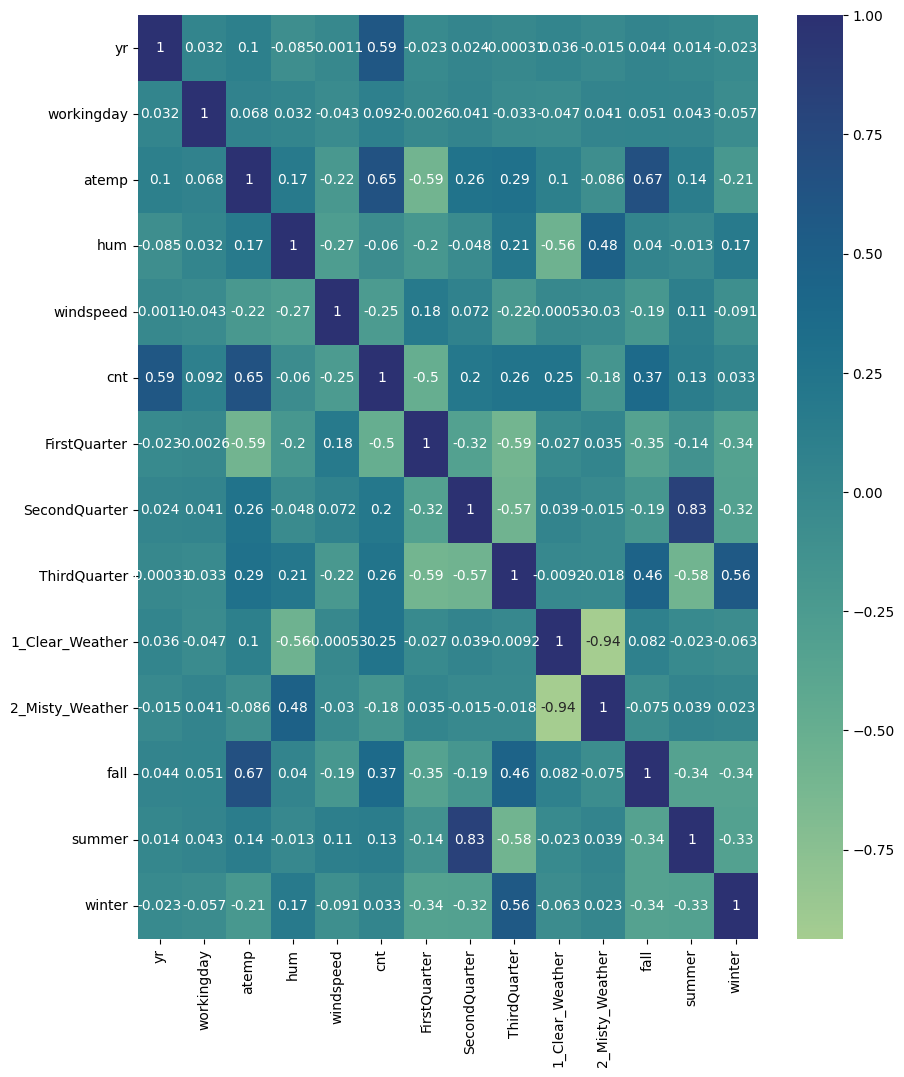

In [21]:
#Plotting corrlation matrix on training test set
plt.figure(figsize=(10,12))
sns.heatmap(day_train.corr(),cmap='crest',annot=True)
plt.show()

# Step 3 - Training the model

In [22]:
# Splitting the Training set into predictor variables set and target variables set
y_train = day_train.pop('cnt')
X_train = day_train

print (y_train.head())
print (X_train.head())

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64
     yr  workingday     atemp       hum  windspeed  FirstQuarter  \
653   1           1  0.501133  0.575354   0.300794             0   
576   1           1  0.766351  0.725633   0.264686             0   
426   1           0  0.438975  0.640189   0.255342             1   
728   1           0  0.200348  0.498067   0.663106             0   
482   1           0  0.391735  0.504508   0.188475             0   

     SecondQuarter  ThirdQuarter  1_Clear_Weather  2_Misty_Weather  fall  \
653              0             1                1                0     0   
576              0             1                1                0     1   
426              0             0                0                1     0   
728              0             1                1                0     0   
482              1             0                0                1     0   

     summer  winter  
653   

In [23]:
# Running RFE with the output number of the variable equal to 14
lm = LinearRegression()
lm.fit(X_train, y_train)

# running Recursive Feature Elimination

rfe = RFE(lm, n_features_to_select=14,step=1)          
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('FirstQuarter', True, 1),
 ('SecondQuarter', True, 1),
 ('ThirdQuarter', True, 1),
 ('1_Clear_Weather', True, 1),
 ('2_Misty_Weather', True, 1),
 ('fall', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [24]:
# BUILDING MODEL USING STATS MODEL
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

X_train_rfe_sm= sm.add_constant(X_train_rfe)

# running the model
lm = sm.OLS(y_train,X_train_rfe_sm)
#fitting the model
lm_model = lm.fit()

In [25]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     191.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.07e-177
Time:                        22:15:31   Log-Likelihood:                 479.11
No. Observations:                 510   AIC:                            -932.2
Df Residuals:                     497   BIC:                            -877.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0308      0.036     -0.851      0.395      -0.102       0.040
yr                  0.2317      0.009     26.875      0.000       0.215       0.249
workingday          0.0232      0.009      2.533      0.012       0.005       0.041
atemp               0.4969      0.037     13.376      0.000       0.424       0.570
hum                -0.1394      0.040     -3.473      0.001      -0.218      -0.061
windspeed          -0.1628      0.027     -5.950      0.000      -0.217      -0.109
FirstQuarter       -0.0083      0.015     -0.567      0.571      -0.037       0.020
SecondQuarter      -0.0140      0.018     -0.758      0.449      -0.050       0.022
ThirdQuarter       -0.0085      0.019     -0.441      0.659      -0.046       0.029
1_Clear_Weather     0.2365      0.028      8.430      0.000       0.181       0.292
2_Misty_Weather     0.1823      0.027      6.863      0.000       0.130       0.234
fall                0.0965      0.027      3.633      0.000       0.044       0.149
summer              0.1289      0.022      5.994      0.000       0.087       0.171
winter              0.1643      0.024      6.946      0.000       0.118       0.211
==============================================================================
Omnibus:                       67.726   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.855
Skew:                          -0.606   Prob(JB):                     6.01e-47
Kurtosis:                       5.924   Cond. No.                     1.13e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
# Calculating VIF
vif= pd.DataFrame()
vif['Feature']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values ,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
7,ThirdQuarter,76.77
6,SecondQuarter,34.81
5,FirstQuarter,29.71
8,1_Clear_Weather,10.22
9,2_Misty_Weather,8.84
10,fall,7.60
12,winter,5.81
11,summer,4.76
2,atemp,3.45
3,hum,1.90


In [27]:
# Removing second Quarter column from the model as it has both high vif and high p value

X_train_rfe_sm.pop('SecondQuarter')
# running the model
lm = sm.OLS(y_train,X_train_rfe_sm)
#fitting the model
lm_model = lm.fit()

In [28]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     191.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.07e-177
Time:                        22:15:31   Log-Likelihood:                 479.11
No. Observations:                 510   AIC:                            -932.2
Df Residuals:                     497   BIC:                            -877.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0448      0.051     -0.871      0.384      -0.146       0.056
yr                  0.2317      0.009     26.875      0.000       0.215       0.249
workingday          0.0232      0.009      2.533      0.012       0.005       0.041
atemp               0.4969      0.037     13.376      0.000       0.424       0.570
hum                -0.1394      0.040     -3.473      0.001      -0.218      -0.061
windspeed          -0.1628      0.027     -5.950      0.000      -0.217      -0.109
FirstQuarter        0.0057      0.021      0.267      0.790      -0.036       0.048
ThirdQuarter        0.0055      0.022      0.247      0.805      -0.038       0.049
1_Clear_Weather     0.2365      0.028      8.430      0.000       0.181       0.292
2_Misty_Weather     0.1823      0.027      6.863      0.000       0.130       0.234
fall                0.0965      0.027      3.633      0.000       0.044       0.149
summer              0.1289      0.022      5.994      0.000       0.087       0.171
winter              0.1643      0.024      6.946      0.000       0.118       0.211
==============================================================================
Omnibus:                       67.726   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.855
Skew:                          -0.606   Prob(JB):                     6.01e-47
Kurtosis:                       5.924   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Calculating VIF
vif= pd.DataFrame()
vif['Feature']=X_train_rfe_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_sm.values ,i) for i in range(X_train_rfe_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,const,146.72
8,1_Clear_Weather,10.22
9,2_Misty_Weather,8.84
10,fall,7.60
7,ThirdQuarter,6.90
12,winter,5.81
6,FirstQuarter,4.84
11,summer,4.76
3,atemp,3.45
4,hum,1.90


In [30]:
# Removing Third Quarter column from the model as it has both high vif and high p value

X_train_rfe_sm.pop('ThirdQuarter')
# running the model
lm = sm.OLS(y_train,X_train_rfe_sm)
#fitting the model
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.43e-179
Time:                        22:15:31   Log-Likelihood:                 479.08
No. Observations:                 510   AIC:                            -934.2
Df Residuals:                     498   BIC:                            -883.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0424      0.050     -0.841      0.401      -0.141       0.057
yr                  0.2317      0.009     26.903      0.000       0.215       0.249
workingday          0.0231      0.009      2.530      0.012       0.005       0.041
atemp               0.4956      0.037     13.495      0.000       0.423       0.568
hum                -0.1382      0.040     -3.472      0.001      -0.216      -0.060
windspeed          -0.1627      0.027     -5.951      0.000      -0.216      -0.109
FirstQuarter        0.0032      0.019      0.171      0.864      -0.034       0.040
1_Clear_Weather     0.2366      0.028      8.443      0.000       0.182       0.292
2_Misty_Weather     0.1823      0.027      6.872      0.000       0.130       0.234
fall                0.0992      0.024      4.096      0.000       0.052       0.147
summer              0.1268      0.020      6.438      0.000       0.088       0.165
winter              0.1671      0.021      8.059      0.000       0.126       0.208
==============================================================================
Omnibus:                       67.435   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.531
Skew:                          -0.602   Prob(JB):                     7.07e-47
Kurtosis:                       5.924   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Calculating VIF
vif= pd.DataFrame()
vif['Feature']=X_train_rfe_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_sm.values ,i) for i in range(X_train_rfe_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,const,141.62
7,1_Clear_Weather,10.22
8,2_Misty_Weather,8.83
9,fall,6.33
11,winter,4.48
10,summer,3.99
6,FirstQuarter,3.77
3,atemp,3.38
4,hum,1.88
5,windspeed,1.20


In [32]:
# Removing First Quarter column from the model as it has high p value

X_train_rfe_sm.pop('FirstQuarter')
# running the model
lm = sm.OLS(y_train,X_train_rfe_sm)
#fitting the model
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.83e-180
Time:                        22:15:31   Log-Likelihood:                 479.06
No. Observations:                 510   AIC:                            -936.1
Df Residuals:                     499   BIC:                            -889.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0388      0.046     -0.847      0.397      -0.129       0.051
yr                  0.2318      0.009     26.953      0.000       0.215       0.249
workingday          0.0232      0.009      2.544      0.011       0.005       0.041
atemp               0.4943      0.036     13.773      0.000       0.424       0.565
hum                -0.1385      0.040     -3.482      0.001      -0.217      -0.060
windspeed          -0.1628      0.027     -5.965      0.000      -0.216      -0.109
1_Clear_Weather     0.2364      0.028      8.453      0.000       0.181       0.291
2_Misty_Weather     0.1822      0.026      6.877      0.000       0.130       0.234
fall                0.0969      0.020      4.813      0.000       0.057       0.136
summer              0.1247      0.016      8.036      0.000       0.094       0.155
winter              0.1644      0.013     12.268      0.000       0.138       0.191
==============================================================================
Omnibus:                       67.377   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.026
Skew:                          -0.600   Prob(JB):                     5.52e-47
Kurtosis:                       5.930   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Calculating VIF
vif= pd.DataFrame()
vif['Feature']=X_train_rfe_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_sm.values ,i) for i in range(X_train_rfe_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,const,117.20
6,1_Clear_Weather,10.19
7,2_Misty_Weather,8.82
8,fall,4.38
3,atemp,3.23
9,summer,2.49
4,hum,1.87
10,winter,1.87
5,windspeed,1.20
1,yr,1.03


In [34]:
# Removing 2_Misty_Weather column from the model as it has high vif value

X_train_rfe_sm.pop('2_Misty_Weather')
# running the model
lm = sm.OLS(y_train,X_train_rfe_sm)
#fitting the model
lm_model = lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.85e-171
Time:                        22:15:31   Log-Likelihood:                 455.97
No. Observations:                 510   AIC:                            -891.9
Df Residuals:                     500   BIC:                            -849.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1721      0.036      4.835      0.000       0.102       0.242
yr                  0.2337      0.009     26.018      0.000       0.216       0.251
workingday          0.0216      0.010      2.273      0.023       0.003       0.040
atemp               0.5084      0.037     13.575      0.000       0.435       0.582
hum                -0.1862      0.041     -4.549      0.000      -0.267      -0.106
windspeed          -0.1914      0.028     -6.787      0.000      -0.247      -0.136
1_Clear_Weather     0.0599      0.012      5.158      0.000       0.037       0.083
fall                0.0886      0.021      4.217      0.000       0.047       0.130
summer              0.1226      0.016      7.561      0.000       0.091       0.155
winter              0.1562      0.014     11.198      0.000       0.129       0.184
==============================================================================
Omnibus:                       87.194   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.132
Skew:                          -0.759   Prob(JB):                     6.72e-66
Kurtosis:                       6.438   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Calculating VIvF
vif= pd.DataFrame()
vif['Feature']=X_train_rfe_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_sm.values ,i) for i in range(X_train_rfe_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,const,64.71
7,fall,4.37
3,atemp,3.22
8,summer,2.49
9,winter,1.86
4,hum,1.82
6,1_Clear_Weather,1.61
5,windspeed,1.17
1,yr,1.03
2,workingday,1.01


## Step 4 - Residuals analysis

In [36]:
# Predicting the values on training set
y_train_pred= lm_model.predict(X_train_rfe_sm)

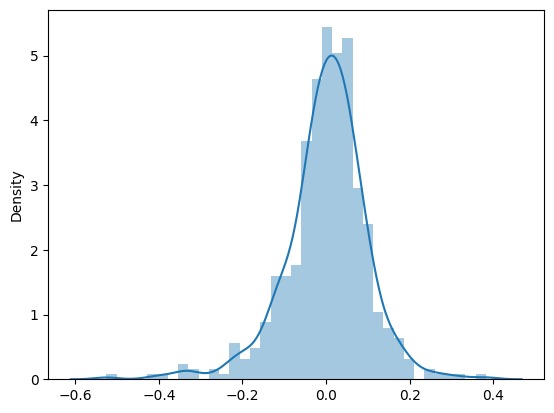

In [37]:
# Getting the residuals
res_train = y_train - y_train_pred
#plotting the residuals
sns.distplot(res_train)
plt.show()

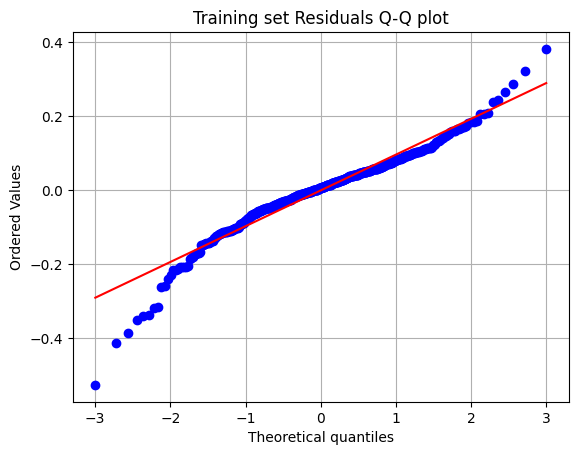

In [38]:
#plotting quantile - quantiles plot 
# Create Q-Q plot
stats.probplot(res_train, dist="norm", plot=plt)
plt.title('Training set Residuals Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

In [39]:
# predicting the values on test set
# performing pre processing on test set

## Rescaling test set numerical columns using min-max scaling method
# creating an object for min max scale
scaler = MinMaxScaler()

# creating a list of numeric variables to be rescaled
num_cols = ['atemp', 'hum', 'windspeed', 'cnt']

# fiitng and transform on the data on test set
day_test[num_cols] = scaler.fit_transform(day_test[num_cols])

In [40]:
# Splitting the Test set into predictor variables set and target variables set
y_test = day_test.pop('cnt')
X_test = day_test

print (y_test.head())
print (X_test.head())

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64
     yr  workingday     atemp       hum  windspeed  FirstQuarter  \
184   0           0  0.778767  0.534223   0.149393             0   
535   1           1  0.855132  0.470417   0.231142             0   
299   0           1  0.492359  0.777843   0.443398             0   
221   0           1  0.805661  0.236659   0.449707             0   
152   0           1  0.749249  0.070765   0.682387             0   

     SecondQuarter  ThirdQuarter  1_Clear_Weather  2_Misty_Weather  fall  \
184              0             1                0                1     1   
535              1             0                1                0     0   
299              0             1                0                1     0   
221              0             1                1                0     1   
152              1             0                1                0     0   

     summer  winter  
184   

In [41]:
# adding constant

X_test_sm = sm.add_constant(X_test)

# Removing column not prsent in Training set
common = X_train_rfe_sm.columns.intersection(X_test_sm.columns)
X_test_sm = X_test_sm[common]

In [42]:
# predicting the values on test set

y_test_pred= lm_model.predict(X_test_sm)

In [43]:
res_test = y_test - y_test_pred
sns.distplot(res)

NameError: name 'res' is not defined

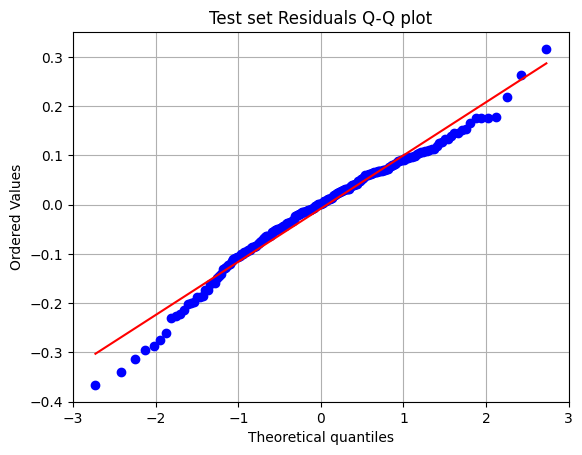

In [ ]:
#plotting quantile - quantiles plot 
# Create Q-Q plot
stats.probplot(res_test, dist="norm", plot=plt)
plt.title('Test set Residuals Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

In [ ]:
# evaluate the model

r2_test=r2_score(y_true=y_test,y_pred=y_test_pred)
r2_train=r2_score(y_true=y_train,y_pred=y_train_pred)

r2_train-r2_test # difference should be less than 5 percent

0.013300607582620971

In [ ]:
# Calculating mean squared error
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

0.011788441293166986

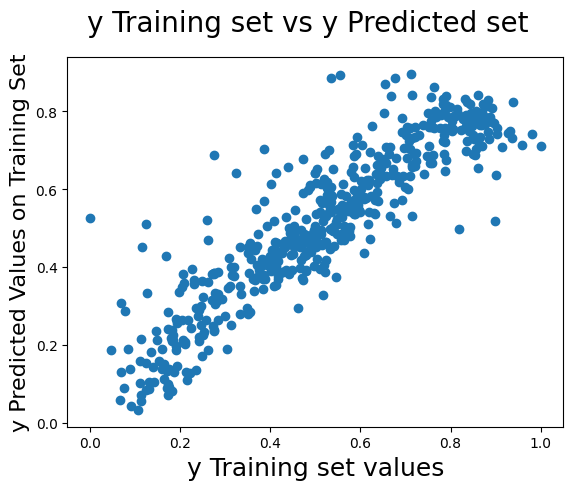

In [ ]:
# Plotting the train values against the predicted values
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y Training set vs y Predicted set', fontsize = 20)            
plt.xlabel('y Training set values', fontsize = 18)                          
plt.ylabel('y Predicted Values on Training Set', fontsize = 16)
plt.show()

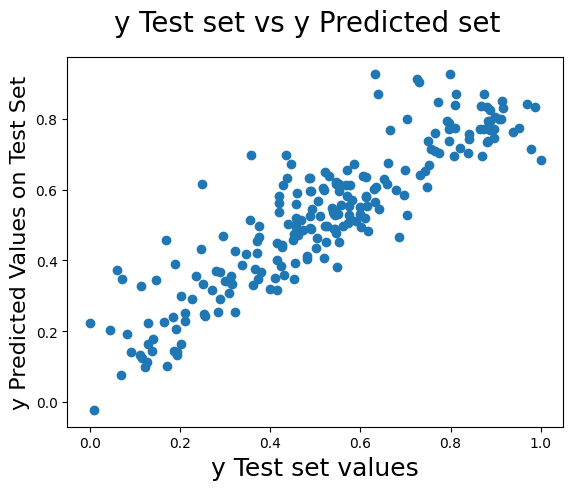

In [ ]:
# Plotting the test values against the predicted values
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y Test set vs y Predicted set', fontsize = 20)            
plt.xlabel('y Test set values', fontsize = 18)                          
plt.ylabel('y Predicted Values on Test Set', fontsize = 16)
plt.show()

In [ ]:
# Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.85e-171
Time:                        22:06:27   Log-Likelihood:                 455.97
No. Observations:                 510   AIC:                            -891.9
Df Residuals:                     500   BIC:                            -849.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1721      0.036      4.835      0.000       0.102       0.242
yr                  0.2337      0.009     26.018      0.000       0.216       0.251
workingday          0.0216      0.010      2.273      0.023       0.003       0.040
atemp               0.5084      0.037     13.575      0.000       0.435       0.582
hum                -0.1862      0.041     -4.549      0.000      -0.267      -0.106
windspeed          -0.1914      0.028     -6.787      0.000      -0.247      -0.136
1_Clear_Weather     0.0599      0.012      5.158      0.000       0.037       0.083
fall                0.0886      0.021      4.217      0.000       0.047       0.130
summer              0.1226      0.016      7.561      0.000       0.091       0.155
winter              0.1562      0.014     11.198      0.000       0.129       0.184
==============================================================================
Omnibus:                       87.194   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.132
Skew:                          -0.759   Prob(JB):                     6.72e-66
Kurtosis:                       6.438   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Based on the model it seems like bike users are directly dependent on the temperature when it rises the demand goes up so we need to to look at the environment where it is more likely to summer and fall season where the demand is more
# Also the demand is more on working days and less on holidays
# Also it seems that 2018 hs more demand than 2019 and it is increasing year on year
# demand goes down on a windy days
